In [54]:
# Import relevant libraries

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import matplotlib.pyplot as plt
print('Imported')

Imported


## 1. Job Profiles: Exploration, Vectorization and Clustering

In [56]:
# Upload skills datasets

ESCO=pd.ExcelFile(r"C:\Users\mschm\Desktop\NCI Final Project\Orientation App\Data\Merged Jobs.xlsx")
jobs=pd.read_excel(ESCO, 'Merged Table')
print(jobs.head())

                                       occupationUri  \
0  http://data.europa.eu/esco/occupation/00030d09...   
1  http://data.europa.eu/esco/occupation/00030d09...   
2  http://data.europa.eu/esco/occupation/00030d09...   
3  http://data.europa.eu/esco/occupation/00030d09...   
4  http://data.europa.eu/esco/occupation/00030d09...   

                                            skillUri  \
0  http://data.europa.eu/esco/skill/fed5b267-73fa...   
1  http://data.europa.eu/esco/skill/05bc7677-5a64...   
2  http://data.europa.eu/esco/skill/271a36a0-bc7a...   
3  http://data.europa.eu/esco/skill/47ed1d37-971b...   
4  http://data.europa.eu/esco/skill/591dd514-735b...   

                            skills_en.preferredLabel  \
0                                 theatre techniques   
1                                organise rehearsals   
2  write risk assessment on performing arts produ...   
3               coordinate with creative departments   
4                 adapt to artists' creative d

In [57]:
# Rename and extract relevant columns

jobs['Occupation']=jobs['occupations_en.preferredLabel']
jobs['Skill']=jobs['skills_en.preferredLabel']
jobs=jobs[['Occupation','Skill']]
print(jobs.head())

           Occupation                                              Skill
0  technical director                                 theatre techniques
1  technical director                                organise rehearsals
2  technical director  write risk assessment on performing arts produ...
3  technical director               coordinate with creative departments
4  technical director                 adapt to artists' creative demands


In [58]:
# Remove spaces for multi word skills in order to reduce bias during vectorization 

jobs['Skill Vec']=jobs['Skill'].str.replace(' ', '', regex=False)
print(jobs['Skill Vec'].head(10))

0                                 theatretechniques
1                                organiserehearsals
2     writeriskassessmentonperformingartsproduction
3                 coordinatewithcreativedepartments
4                    adapttoartists'creativedemands
5    negotiatehealthandsafetyissueswiththirdparties
6          adaptdesigners’worktotheperformancevenue
7                            promotehealthandsafety
8     coordinatetechnicalteamsinartisticproductions
9                              writetechnicalriders
Name: Skill Vec, dtype: object


In [59]:
# Validate that observations for integrated jobs dataset are matching with original skills and occupations datasets

print(jobs['Skill Vec'].nunique())
print(jobs['Occupation'].nunique())

13492
3039


In [60]:
# Check for null values

jobs.isna().sum()

Occupation    0
Skill         0
Skill Vec     0
dtype: int64

In [61]:
jobs= jobs.groupby('Occupation')['Skill Vec'].apply(lambda skill: ' '.join(skill)).reset_index()
print(jobs.head())
print(jobs.shape)

                           Occupation  \
0   artificial intelligence engineer    
1                         3D animator   
2                         3D modeller   
3              3D printing technician   
4               ATM repair technician   

                                           Skill Vec  
0  digitaldataprocessing informationstructure com...  
1  particleanimation principlesofanimation 3Dtext...  
2  3Dtexturing 3Dlighting augmentedreality comput...  
3  3Dprintingprocess printingonlargescalemachines...  
4  mechanicaltools securitythreats ATMsystems ele...  
(3039, 2)


In [62]:
jobs.shape

(3039, 2)

In [118]:
# Apply TfidfVectorizer in order to vectorize jobs into a comparable format with the students dataset

vectorizer = TfidfVectorizer() 
vec_jobs_skills = vectorizer.fit_transform(jobs['Skill Vec'])
print(vec_jobs_skills.shape)

(3039, 14007)


In [120]:
#Transform the vectorized data into a frame in order to be visualizable

jobsvec=pd.DataFrame(vec_jobs_skills).head()
jobsvec

,0
0,"(0, 7419)\t0.09148566728914939\n (0, 1622)\..."
1,"(0, 4073)\t0.18453814174174177\n (0, 11623)..."
2,"(0, 2908)\t0.08958945371060295\n (0, 930)\t..."
3,"(0, 3484)\t0.1466442061721987\n (0, 2042)\t..."
4,"(0, 11258)\t0.1995113627698705\n (0, 9583)\..."


In [122]:
# Cluster occupations in order to surface areas of interest. 

clustered_jobs_15 = KMeans(n_clusters=15, random_state=10)
clusters_15 = clustered_jobs_15.fit_predict(vec_jobs_skills)
jobs['Cluster K-15'] = clusters_15
jobs.groupby('Cluster K-15')['Cluster K-15'].value_counts()

C:\Users\mschm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster K-15
0       96
1       46
2       59
3       58
4       80
5      134
6       62
7       72
8      143
9       35
10     178
11    1818
12     153
13      71
14      34
Name: count, dtype: int64

In [124]:
# 25 clusters simulation with K-means

clustered_jobs_25 = KMeans(n_clusters=25, random_state=10)
clusters_25 = clustered_jobs_25.fit_predict(vec_jobs_skills)
jobs['Cluster K-25'] = clusters_25
jobs.groupby('Cluster K-25')['Cluster K-25'].value_counts()

C:\Users\mschm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster K-25
0       57
1      138
2      128
3       36
4      135
5      132
6     1196
7       35
8       41
9       51
10      37
11      93
12      40
13      71
14      48
15      59
16      75
17      45
18      46
19      94
20      79
21      70
22      44
23     124
24     165
Name: count, dtype: int64

In [126]:
# 30 clusters simulation with K-means

clustered_jobs_30 = KMeans(n_clusters=30, random_state=10)
clusters_30 = clustered_jobs_30.fit_predict(vec_jobs_skills)
jobs['Cluster K-30'] = clusters_30
jobs.groupby('Cluster K-30')['Cluster K-30'].value_counts()

C:\Users\mschm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster K-30
0     255
1     114
2     103
3     662
4     112
5     155
6      36
7      58
8      58
9     211
10     34
11     90
12     69
13     36
14     40
15     56
16    108
17     99
18     18
19     79
20     95
21     46
22     41
23     35
24     48
25     51
26     50
27     90
28     89
29    101
Name: count, dtype: int64

In [128]:
# Agglomerative Clustering simulation for 25 clusters

agglomerated_jobs_25 = AgglomerativeClustering(n_clusters=25)
labels_25 = agglomerated_jobs_25.fit_predict(vec_jobs_skills.toarray())
jobs["Cluster Agg-25"] = labels_25
jobs.groupby("Cluster Agg-25")["Cluster Agg-25"].value_counts()

Cluster Agg-25
0       75
1       71
2     1487
3       55
4       23
5       52
6      228
7      103
8       38
9      126
10      94
11      73
12      35
13      33
14     112
15      43
16      83
17      38
18      42
19      44
20      62
21      35
22      18
23      35
24      34
Name: count, dtype: int64

In [130]:
# Agglomerative Clustering simulation for 30 clusters

agglomerated_jobs_30 = AgglomerativeClustering(n_clusters=30)
labels_30 = agglomerated_jobs_30.fit_predict(vec_jobs_skills.toarray())
jobs["Cluster Agg-30"] = labels_30
jobs.groupby("Cluster Agg-30")["Cluster Agg-30"].value_counts()

Cluster Agg-30
0     1400
1      165
2       70
3       55
4       23
5       52
6       62
7      103
8       38
9      126
10      94
11      73
12      17
13      45
14     112
15      43
16      83
17      38
18      42
19      44
20      62
21      35
22      18
23      35
24      34
25      13
26      35
27      33
28      26
29      63
Name: count, dtype: int64

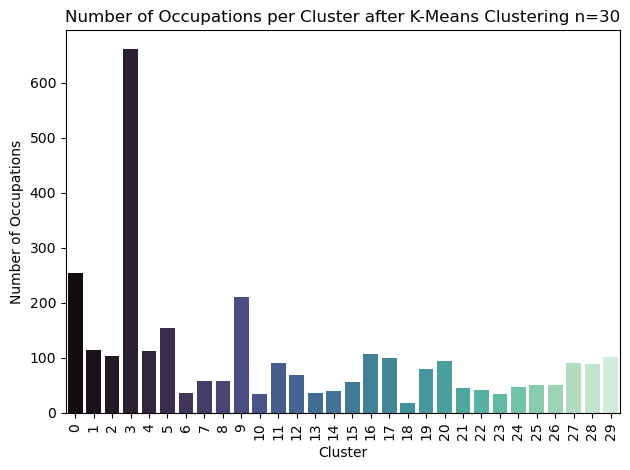

In [70]:
# Visualize number of data points for each cluster for the 30 K-Means clusters

jobs["Cluster K-30"] = jobs["Cluster K-30"].astype(int)
ordered_clusters = sorted(jobs["Cluster K-30"].unique())

plt.figure()
sns.countplot(data=jobs, x="Cluster K-30",order=ordered_clusters, palette="mako")

plt.title("Number of Occupations per Cluster after K-Means Clustering n=30")
plt.xlabel("Cluster")
plt.ylabel("Number of Occupations")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [71]:
# Extract 10 top labels for each cluster in order to surface more general area / domain of interest

def print_top_terms_kmeans(kmeans_model, vectorizer, n_terms=10):
    terms = vectorizer.get_feature_names_out()
    centers = kmeans_model.cluster_centers_

    for idx, centroid in enumerate(centers):
        top_term_indices = centroid.argsort()[::-1][:n_terms]
        top_terms = [terms[i] for i in top_term_indices]
        print(f"Cluster {idx}: {', '.join(top_terms)}")

print_top_terms_kmeans(
    kmeans_model=clustered_jobs_30, 
    vectorizer=vectorizer,
    n_terms=10
)

Cluster 0: managebudgets, managegovernmentpolicyimplementation, governmentpolicyimplementation, liaisewithlocalauthorities, maintainrelationshipswithgovernmentagencies, managestaff, developprofessionalnetwork, performprojectmanagement, maintainrelationswithlocalrepresentatives, observeconfidentiality
Cluster 1: applyblendedlearning, communicatewithanon, applyforresearchfunding, evaluateresearchactivities, conductresearchacrossdisciplines, operateopensourcesoftware, managefindableaccessibleinteroperableandreusabledata, demonstratedisciplinaryexpertise, disseminateresultstothescientificcommunity, teachinacademicorvocationalcontexts
Cluster 2: optimiseproductionprocessesparameters, inspectqualityofproducts, applyaprotectivelayer, maintainequipment, measurematerials, evaluaterestorationprocedures, maintainmoulds, writebatchrecorddocumentation, applyrestorationtechniques, createsmoothwoodsurface
Cluster 3: usedifferentcommunicationchannels, maintaincustomerservice, trainemployees, handlecus

In [72]:
# Map clusters with their respective domain of interests

domains = {
    0: "Public Administration",
    1: "Academic Research",
    2: "Production Operations",
    3: "Customer Service",
    4: "Food Processing",
    5: "Stage Production",
    6: "Logistics Operations",
    7: "Metal Manufacturing",
    8: "Social Services",
    9: "Environmental Engineering",
    10: "Supply Chain",
    11: "Construction Support",
    12: "Textile Technology",
    13: "International Trade",
    14: "Animal Care",
    15: "Agricultural Science",
    16: "Client Relations",
    17: "Teaching Support",
    18: "Leather Processing",
    19: "Healthcare Practice",
    20: "Electronic Assembly",
    21: "Retail Management",
    22: "Retail Operations",
    23: "Business Development",
    24: "Software Development",
    25: "Footwear Manufacturing",
    26: "Military Operations",
    27: "Engineering Support",
    28: "Financial Analysis",
    29: "Automated Manufacturing"
}

jobs['Domain of Interest'] = jobs['Cluster K-30'].map(domains)
print(jobs.head(20))

                              Occupation  \
0      artificial intelligence engineer    
1                            3D animator   
2                            3D modeller   
3                 3D printing technician   
4                  ATM repair technician   
5                       EU funds manager   
6                 Freinet school teacher   
7               ICT accessibility tester   
8                    ICT account manager   
9           ICT application configurator   
10             ICT application developer   
11                   ICT auditor manager   
12         ICT business analysis manager   
13                  ICT business analyst   
14      ICT business development manager   
15                             ICT buyer   
16                  ICT capacity planner   
17  ICT change and configuration manager   
18                        ICT consultant   
19         ICT disaster recovery analyst   

                                            Skill Vec  Cluster K-15  \
0   

In [73]:
# Concatenate skills and area of interest for second vectorization

jobs["Skill and Domain"] = jobs["Skill Vec"] + " " + jobs["Domain of Interest"]
print(jobs['Skill and Domain'].head())

0    digitaldataprocessing informationstructure com...
1    particleanimation principlesofanimation 3Dtext...
2    3Dtexturing 3Dlighting augmentedreality comput...
3    3Dprintingprocess printingonlargescalemachines...
4    mechanicaltools securitythreats ATMsystems ele...
Name: Skill and Domain, dtype: object


In [132]:
# Second vectorization including skills and domains of interest

vectorizer2 = TfidfVectorizer() 
vec_jobs_skills_domains = vectorizer2.fit_transform(jobs['Skill and Domain'])
print(vec_jobs_skills_domains.shape)

(3039, 14047)


## 2. Student Profiles: Exploration and Vectorization

In [100]:
jobs[['Skill Vec','Domain of Interest']].head() 

,Skill Vec,Domain of Interest
0,digitaldataprocessing informationstructure com...,Software Development
1,particleanimation principlesofanimation 3Dtext...,Customer Service
2,3Dtexturing 3Dlighting augmentedreality comput...,Software Development
3,3Dprintingprocess printingonlargescalemachines...,Engineering Support
4,mechanicaltools securitythreats ATMsystems ele...,Client Relations


In [76]:
#Extract list of unique skills and domain of interest to compute the student profiles dataset

skills_tab=pd.read_excel(ESCO, 'Merged Table')
student_skills=skills_tab['skills_en.preferredLabel'].unique()
student_domains=jobs['Domain of Interest'].unique()

print(student_skills[0:5])
print(student_domains[0:5])
print(student_skills.size)
print(student_domains.size)

['theatre techniques' 'organise rehearsals'
 'write risk assessment on performing arts production'
 'coordinate with creative departments'
 "adapt to artists' creative demands"]
['Software Development' 'Customer Service' 'Engineering Support'
 'Client Relations' 'Public Administration']
13492
30


In [112]:
#Compute student profiles dataset by randomly selecting skills and domains of interest 

np.random.seed(10)
num_profiles = 20000

def create_profiles():
    skills = np.random.choice(student_skills, 5, replace=False)
    skill_vec = ' '.join(skill.replace(' ', '').lower() for skill in skills)
    domain = np.random.choice(student_domains)
    return {'Skill Vec': skill_vec, 'Domain of Interest': domain}

student_profiles = [create_student_profile() for _ in range(num_students)]
students = pd.DataFrame(student_profiles)

print(students.head())
print(students.shape)
print(students['Skill Vec'].nunique())

                                           Skill Vec       Domain of Interest
0  batterytesters presentexhibition controlslatec...     Agricultural Science
1  performmusicinensemble develophealthandsafetys...         Stage Production
2  manipulatestainlesssteel providecustomerswithp...         Customer Service
3  endoscopy purchasecarmaterials strategiesforha...  Automated Manufacturing
4  spraypesticides operateprecisionmachinery salt...         Teaching Support
(20000, 2)
20000


In [ ]:
# Vectorize students dataset including only skills 

In [ ]:
# Vectorize students dataset including skills and domains of interest